#Course 01 
**Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning**

##Week 04

### Load and unzip the dataset

In [0]:
pip install tensorflow --upgrade --force-reinstall

     |████████████████████████████████| 421.8MB 33kB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 1.3MB 53.9MB/s 
     |████████████████████████████████| 20.2MB 228kB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 450kB 49.1MB/s 
     |████████████████████████████████| 3.9MB 36.3MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 2.7MB 44.3MB/s 
     |████████████████████████████████| 112kB 55.9MB/s 
     |████████████████████████████████| 26.1MB 1.8MB/s 
     |████████████████████████████████| 583kB 40.9MB/s 
     |████████████████████████████████| 2.9MB 44.5MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
     |████████████████████████████████| 307kB 45.5MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
     

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc1


In [0]:
# First download the data :

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /content/horse-or-human.zip

--2020-03-30 16:59:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/content/horse-or-human.zip’

/content/horse-or-h 100%[===================>] 142.65M   112MB/s    in 1.3s    

2020-03-30 17:00:00 (112 MB/s) - ‘/content/horse-or-human.zip’ saved [149574867/149574867]



The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data.

In [0]:
import os
import zipfile

In [0]:
zipped_file_path = '/content/horse-or-human.zip'

#Create a Reference to the zipped file 
zipped_file_ref = zipfile.ZipFile(zipped_file_path ,'r')

#extract the contents from the zipped reference created
zipped_file_ref.extractall('/content/horse-or-human')

#Lets close the zipped file reference created 
zipped_file_ref.close()

Now this horse-or-human becomes our base directory and from here we need to create our own Train and test directory for both horses and human.

horse-or-human ---->  

1. Train_Set      ----->  1.a.) Horse  1.b.) Human

2. validation_Set ----->  2.a.) Horse  2.b.) Human
                    

###Visualize the Dataset

In [0]:
train_horse_dir = os.path.join('/content/horse-or-human/horses')

train_human_dir = os.path.join('/content/horse-or-human/humans')

Now lets see how the file names look like in the folders :

In [0]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:5])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:5])

['horse22-4.png', 'horse27-2.png', 'horse32-4.png', 'horse04-0.png', 'horse12-2.png']
['human13-30.png', 'human02-28.png', 'human12-07.png', 'human09-01.png', 'human02-09.png']


Now lets find out the total number of images in these directories :

In [0]:
print('Total number of training Horse Images : ',len(os.listdir(train_horse_dir)))
print('Total number of training Human Images : ',len(os.listdir(train_human_dir)))

Total number of training Horse Images :  500
Total number of training Human Images :  527


Now lets try to print some of the images :

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

# lets decide the format in which we want to output the images :
nrows = 4
ncols = 4

#index for iterating over images 
pic_index = 20

Now lets display a batch of 8 horses and 8 humans :

In [0]:
#set up matlpotlib  fig and size it to fit 4*4 pics:

fig = plt.gcf()
#decide on the size with which it is to be displayed 
fig.set_size_inches(ncols*4,nrows*4)

pic_index += 8

#lets now create a list of names of the pics to be displayed wrt to the root folder :
next_horse_pic = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pic = [os.path.join(train_human_dir,fname) for fname in train_human_names[pic_index-8:pic_index]]

final_list_of_image_paths = next_horse_pic + next_human_pic

for i,img_path in enumerate(final_list_of_image_paths):
  #set up the subplots:
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Understanding the Image generator 

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:

train_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/horse-or-human/'

train_generator = train_datagen.flow_from_directory( directory = train_dir,
                                                     target_size = (300,300),
                                                     batch_size  = 128,
                                                     class_mode = 'binary'  )

Found 1027 images belonging to 2 classes.


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs = {}):
    if logs.get('accuracy') > 0.998:
      print('\nTerminating Training as accuracy has reached 99.8 %')
      self.model.stop_training = True

callbacks = myCallback()

### Now lets use all the data and knowledge to build an ML Model

**Build the model**

In [0]:
# Lets update the input shape to (300,300,3) @ first layer of the model that is the convolution layer 

model = tf.keras.models.Sequential([ 
                                    tf.keras.layers.Conv2D(filters = 16 , kernel_size =(3,3),activation = 'relu' ,input_shape = (300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(filters = 64, kernel_size =(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(filters = 64 , kernel_size =(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(units = 512 , activation = 'relu'),

                                    tf.keras.layers.Dense(units = 1 , activation = 'sigmoid')
])


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

**Compile the model**

In [0]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001), loss = 'binary_crossentropy' , metrics = ['accuracy'])

**Loading the data for training**

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /content/horse-or-human.zip

--2020-03-30 17:00:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/content/horse-or-human.zip’

/content/horse-or-h 100%[===================>] 142.65M   340MB/s    in 0.4s    

2020-03-30 17:00:17 (340 MB/s) - ‘/content/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile

zipped_file_path = '/content/horse-or-human.zip'

#Create a Reference to the zipped file 
zipped_file_ref = zipfile.ZipFile(zipped_file_path ,'r')

#extract the contents from the zipped reference created
zipped_file_ref.extractall('/content/horse-or-human')

#Lets close the zipped file reference created 
zipped_file_ref.close()

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)

train_dir = '/content/horse-or-human/'

train_generator = train_datagen.flow_from_directory( directory = train_dir,
                                                     target_size = (300,300),
                                                     batch_size  = 128,
                                                     class_mode = 'binary'  )

Found 1027 images belonging to 2 classes.


**Loading the data for validation**

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /content/validation-horse-or-human.zip

--2020-03-30 17:35:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/content/validation-horse-or-human.zip’

/content/validation 100%[===================>]  10.95M  --.-KB/s    in 0.04s   

2020-03-30 17:35:00 (309 MB/s) - ‘/content/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
# Lets unzip the data and place it properly 
import os
import zipfile

zipped_folder_path = '/content/validation-horse-or-human.zip'

zipped_file_ref = zipfile.ZipFile(zipped_folder_path ,'r')

zipped_file_ref.extractall('/content/validation-horse-or-human')

zipped_file_ref.close()


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

validation_datagen = ImageDataGenerator(rescale = 1/255)

validation_directory  = '/content/validation-horse-or-human/'

validation_generator = validation_datagen.flow_from_directory(
                                                              directory = validation_directory,
                                                              target_size = (300,300),
                                                              batch_size = 32,
                                                              class_mode = 'binary'
                                                             )

Found 256 images belonging to 2 classes.


**Training the Model**

In [0]:
# model.fit(x,y,epochs = 1 , callbacks = [callbacks])

# Now as we have a image_generator we will be using the fit_gerator inplace of .fit()

history =  model.fit_generator( train_generator,
                                steps_per_epoch = 8,
                                epochs = 15,
                                verbose = 1,
                                validation_data = validation_generator,
                                validation_steps = 8,
                               )

Epoch 1/15
8/8 [==============================] - 7s 849ms/step - loss: 0.0389 - accuracy: 0.9932 - val_loss: 1.0781 - val_accuracy: 0.8320
Epoch 2/15
8/8 [==============================] - 7s 881ms/step - loss: 0.0160 - accuracy: 0.9944 - val_loss: 1.7607 - val_accuracy: 0.7969
Epoch 3/15
8/8 [==============================] - 6s 782ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.8222 - val_accuracy: 0.7930
Epoch 4/15
8/8 [==============================] - 6s 778ms/step - loss: 0.0164 - accuracy: 0.9900 - val_loss: 4.0748 - val_accuracy: 0.6289
Epoch 5/15
8/8 [==============================] - 6s 780ms/step - loss: 0.1050 - accuracy: 0.9566 - val_loss: 1.6929 - val_accuracy: 0.7969
Epoch 6/15
8/8 [==============================] - 6s 780ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 1.9700 - val_accuracy: 0.8047
Epoch 7/15
8/8 [==============================] - 6s 770ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.9673 - val_accuracy: 0.8008
Epoch 8/15
8/8 [====

### Running the Trained Model for Prediction

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
uploaded = files.upload()

In [0]:

for fn in uploaded.keys():

  #predicting images :
  path = '/content/' + fn
  img = image.load_img(path , target_size = (300,300))
  
  x = image.img_to_array(img)
  x = np.expand_dims(x , axis = 0)

  images = np.vstack([x])
  classes= model.predict(images,batch_size = 10)
  print(classes[0])

  if classes[0] > 0.5 :
    print( fn + ' is a human')
  else:
    print(fn + ' is a horse')

In [0]:
#predicting images :

fn = 'horse-3.jpg'


path = '/content/' + fn
img = image.load_img(path , target_size = (300,300))

x = image.img_to_array(img)
x = np.expand_dims(x , axis = 0)

images = np.vstack([x])
classes= model.predict(images,batch_size = 10)
print(classes[0])

if classes[0] > 0.5 :
  print( fn + ' is a human')
else:
  print(fn + ' is a horse')

[1.]
horse-3.jpg is a human


###Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


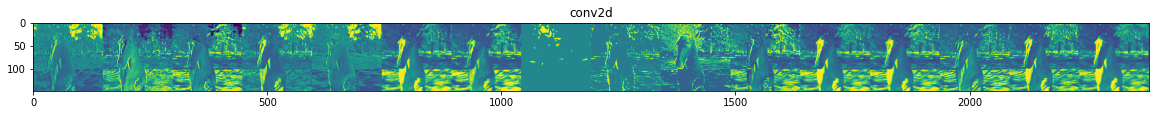

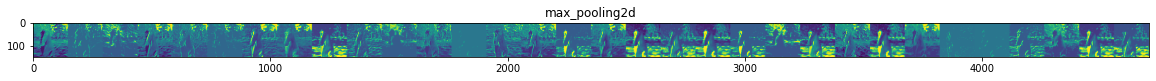

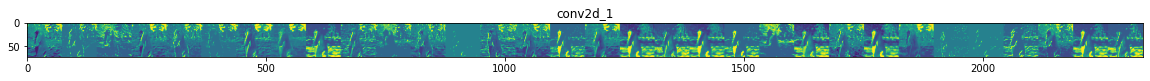

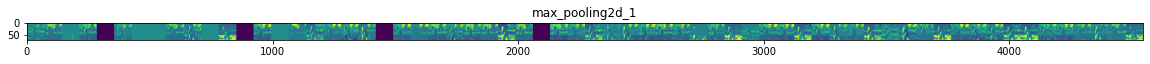

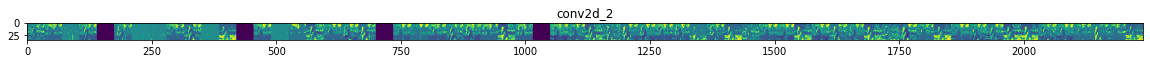

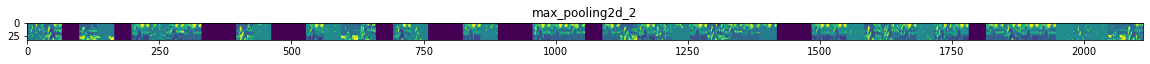

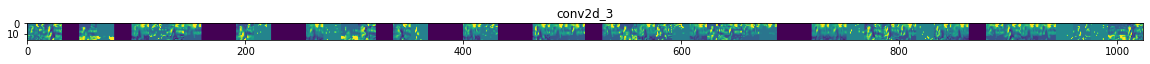

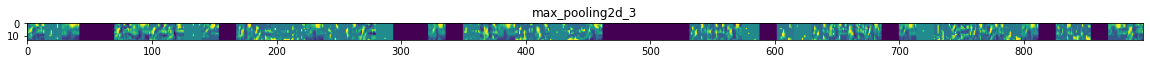

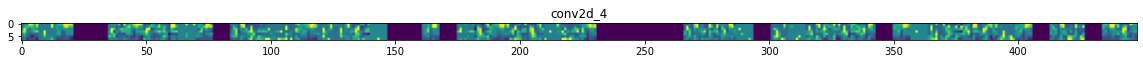

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')



As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.

These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.


###Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

### Assignment-04

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. Create a convolutional neural network that trains to 100% accuracy on these images, which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.


In [0]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/content/happy-or-sad.zip"

--2020-03-30 18:37:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/content/happy-or-sad.zip’

/content/happy-or-s 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2020-03-30 18:37:23 (235 MB/s) - ‘/content/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
# lets now extract the file contents :
import os
import zipfile

zipped_folder_path = '/content/happy-or-sad.zip'
zip_ref = zipfile.ZipFile(zipped_folder_path ,'r')
zip_ref.extractall('/content/happy-or-sad/')
zip_ref.close()

In [0]:
#lets now analyze the dataset :

happy_face_directory = os.path.join('/content/happy-or-sad/happy')
sad_face_directory = os.path.join('/content/happy-or-sad/sad')

happy_face_names = os.listdir(happy_face_directory)
print(happy_face_names[0:5])

sad_face_names = os.listdir(sad_face_directory)
print(sad_face_names[0:5])

#lets count them :
print('\nnumber of happy faces : ',len(os.listdir(happy_face_directory)))
print('number of sad faces : ',len(os.listdir(sad_face_directory)))

['happy2-07.png', 'happy2-05.png', 'happy2-12.png', 'happy1-15.png', 'happy1-09.png']
['sad1-10.png', 'sad1-08.png', 'sad2-10.png', 'sad1-17.png', 'sad1-18.png']

number of happy faces :  40
number of sad faces :  40



Shape of the happy face images :  (150, 150, 4)


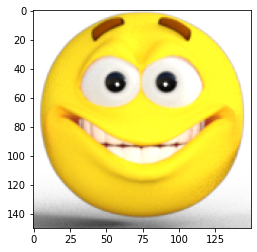


Shape of the Sad Faces :  (150, 150, 4)


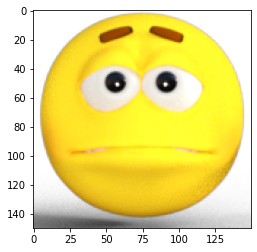

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

happy_face  = mpimg.imread(os.path.join(happy_face_directory, happy_face_names[1]))
print('\nShape of the happy face images : ', happy_face.shape)
plt.imshow(happy_face)
plt.show()

sad_face = mpimg.imread(os.path.join(sad_face_directory,sad_face_names[0]))
print('\nShape of the Sad Faces : ',sad_face.shape)
plt.imshow(sad_face)
plt.show()

In [0]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.
    import tensorflow as tf
    import numpy as np 

    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
         def on_epoch_end(self,epoch,logs ={}):
           if logs.get('accuracy') > DESIRED_ACCURACY:
             print('\nReached 99.9% accuracy so cancelling training!')
             self.model.stop_training = True

    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([ 
                                        
            tf.keras.layers.Conv2D(filters = 16 , kernel_size = (3,3) ,activation = 'relu',input_shape =(150,150,3)),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Flatten(),

            tf.keras.layers.Dense(units = 512 , activation = 'relu'),

            tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'),
        
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(optimizer = RMSprop(lr = 0.001), loss = 'binary_crossentropy',metrics = ['accuracy'])
        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale = 1/255)

    # Please use a target_size of 150 X 150.
    train_generator = train_datagen.flow_from_directory(
                                                        directory = '/content/happy-or-sad/',
                                                        target_size = (150,150),
                                                        batch_size = 16,
                                                        class_mode = 'binary'
                                                       )
    # Expected output: 'Found 80 images belonging to 2 classes'

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
    history = model.fit_generator( train_generator,
                                   steps_per_epoch = 5,
                                   epochs = 20,
                                   verbose = 1,
                                   callbacks= [callbacks])
    
    return history.history['accuracy'][-1]

In [0]:
# The Expected output: "Reached 99.9% accuracy so cancelling training!""
train_happy_sad_model()

Found 80 images belonging to 2 classes.
Epoch 1/20
5/5 [==============================] - 0s 24ms/step - loss: 3.3109 - accuracy: 0.5750
Epoch 2/20
5/5 [==============================] - 0s 22ms/step - loss: 0.5993 - accuracy: 0.6125
Epoch 3/20
5/5 [==============================] - 0s 25ms/step - loss: 0.3794 - accuracy: 0.9125
Epoch 4/20
5/5 [==============================] - 0s 23ms/step - loss: 0.2403 - accuracy: 0.8875
Epoch 5/20
5/5 [==============================] - 0s 23ms/step - loss: 0.1671 - accuracy: 0.9125
Epoch 6/20
5/5 [==============================] - 0s 24ms/step - loss: 0.4048 - accuracy: 0.8125
Epoch 7/20
5/5 [==============================] - 0s 25ms/step - loss: 0.1240 - accuracy: 0.9500
Epoch 8/20
5/5 [==============================] - 0s 22ms/step - loss: 0.1219 - accuracy: 0.9375
Epoch 9/20
5/5 [==============================] - 0s 25ms/step - loss: 0.0587 - accuracy: 0.9875
Epoch 10/20
5/5 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 1

1.0

### Coursera assignment as it is :

In [0]:
# import tensorflow as tf
# import os
# import zipfile
# from os import path, getcwd, chdir

# # DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# # environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# # and place it inside a local folder and edit the path to that location

# path = f"{getcwd()}/../tmp2/happy-or-sad.zip"

# zip_ref = zipfile.ZipFile(path, 'r')
# zip_ref.extractall("/tmp/h-or-s")
# zip_ref.close()

In [0]:
# # GRADED FUNCTION: train_happy_sad_model
# def train_happy_sad_model():
#     # Please write your code only where you are indicated.
#     # please do not remove # model fitting inline comments.

#     DESIRED_ACCURACY = 0.999

#     class myCallback(# your code):
#          # Your Code

#     callbacks = myCallback()
    
#     # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
#     model = tf.keras.models.Sequential([
#         # Your Code Here
#     ])

#     from tensorflow.keras.optimizers import RMSprop

#     model.compile(# Your Code Here #)
        

#     # This code block should create an instance of an ImageDataGenerator called train_datagen 
#     # And a train_generator by calling train_datagen.flow_from_directory

#     from tensorflow.keras.preprocessing.image import ImageDataGenerator

#     train_datagen = # Your Code Here

#     # Please use a target_size of 150 X 150.
#     train_generator = train_datagen.flow_from_directory(
#         # Your Code Here)
#     # Expected output: 'Found 80 images belonging to 2 classes'

#     # This code block should call model.fit_generator and train for
#     # a number of epochs.
#     # model fitting
#     history = model.fit_generator(
#           # Your Code Here)
#     # model fitting
#     return history.history['acc'][-1]

In [0]:
# # The Expected output: "Reached 99.9% accuracy so cancelling training!""
# train_happy_sad_model()

In [0]:
# %%javascript
# <!-- Save the notebook -->
# IPython.notebook.save_checkpoint();

In [0]:
# %%javascript
# IPython.notebook.session.delete();
# window.onbeforeunload = null
# setTimeout(function() { window.close(); }, 1000);